# Train using data from Tallo

1. Here the goal is to use the small training sample of annotated trees to develop a "cutoff" for masking
2. This masking will then be applied to all tallo subsets and used as training for the tree species
3. The species classifier will then be used to test on the data from NEON

In [12]:
# First we need to map between the satellite and the files

import pandas as pd
import os

data_dir = '../data/harvard/'
df = pd.read_csv(f'{data_dir}tallo_neon_species_dedup_subsample.csv')
sat_files = os.listdir(f'{data_dir}neon_harvard/')

# Add the paths to the trees based on the image IDs
img_id_to_paths = {}
for f in sat_files:
    try:
        for s in os.listdir(f'{data_dir}neon_harvard/{f}/PSScene/'):
            if '.tif' in s and '_3B_AnalyticMS_SR_8b_clip.tif' in s: #'20221218_230845_90_2459_3B_AnalyticMS_SR_8b_clip.tif'
                img_id = s.replace('_3B_AnalyticMS_SR_8b_clip.tif', '')
                img_id_to_paths[img_id] = f'{data_dir}neon_harvard/{f}/PSScene/{s}'
    except:
        print(f)
# Now add to the df
paths = []
for img_id in df['image_ids'].values:
    paths.append(img_id_to_paths.get(img_id))
df['path'] = paths
df

.DS_Store


,latitude,longitude,tree_id,division,family,genus,species,stem_diameter_cm,height_m,crown_radius_m,binary_label,x0,x1,y0,y1,image_ids,path
0,37.62,-93.40,T_447826,Angiosperm,Fagaceae,Quercus,Quercus velutina,26.266667,19.400000,2.766667,0,37.616875,37.623125,-93.402252,-93.397748,20230117_155812_29_241b,../data/harvard/neon_harvard/9f945254-6af7-47f...
1,38.03,-77.35,T_446766,Angiosperm,Fagaceae,Quercus,Quercus velutina,22.600000,16.150000,3.200000,0,38.026875,38.033125,-77.352252,-77.347748,20230124_145421_82_2436,../data/harvard/neon_harvard/03c76202-c9da-40f...
2,39.00,-89.02,T_447195,Angiosperm,Fagaceae,Quercus,Quercus velutina,32.640000,19.340000,4.170000,0,38.996875,39.003125,-89.022252,-89.017748,20230205_154126_02_2448,../data/harvard/neon_harvard/0d9c5965-52c9-450...
3,41.35,-72.90,T_450036,Angiosperm,Fagaceae,Quercus,Quercus velutina,40.250000,25.650000,5.125000,0,41.346875,41.353125,-72.902252,-72.897748,20230205_144818_37_24af,../data/harvard/neon_harvard/3efe983c-72b9-430...
4,36.91,-94.33,T_448444,Angiosperm,Fagaceae,Quercus,Quercus velutina,33.650000,24.700000,3.425000,0,36.906875,36.913125,-94.332252,-94.327748,20230223_160223_85_241a,../data/harvard/neon_harvard/e4daba88-41bc-42e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,44.17,-70.21,T_446991,Gymnosperm,Pinaceae,Picea,Picea rubens,25.200000,16.414286,2.750000,1,44.166875,44.173125,-70.212252,-70.207748,20230207_143455_13_241e,../data/harvard/neon_harvard/104520c5-81a9-4be...
523,44.27,-72.61,T_446525,Gymnosperm,Pinaceae,Picea,Picea rubens,25.475000,21.612500,2.806250,1,44.266875,44.273125,-72.612252,-72.607748,20230204_151911_15_24a3,../data/harvard/neon_harvard/a4a915f2-65bb-4ba...
524,44.87,-68.63,T_84100,Gymnosperm,Pinaceae,Picea,Picea rubens,29.587500,18.262500,2.284375,1,44.866875,44.873125,-68.632252,-68.627748,20230216_150424_37_247b,../data/harvard/neon_harvard/4d014201-9670-489...
525,44.97,-70.44,T_446489,Gymnosperm,Pinaceae,Picea,Picea rubens,25.800000,17.700000,2.675000,1,44.966875,44.973125,-70.442252,-70.437748,20230122_144013_84_24ce,../data/harvard/neon_harvard/ded8331d-0058-42f...


# Visualise the different species 

--------------------------------------------------------------------------------
left edge coord:	362124.0	
bottom edge coord:	4808604.0	
right edge coord:	362643.0	
top edge coord:	4809117.0	
dataset width:	173	
dataset height:	171	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32616	
data transform
	| 3.00, 0.00, 362124.00|
| 0.00,-3.00, 4809117.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	350391.0	
bottom edge coord:	4863300.0	
right edge coord:	350907.0	
top edge coord:	4863816.0	
dataset width:	172	
dataset height:	172	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32617	
data transform
	| 3.00, 0.00, 350391.00|
| 0.00,-3.00, 4863816.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

--------------------------------------------------------------------------------
left edge coord:	265443.0	
bottom edge coord:	4681179.0	
right edge coord:	265980.0	
top edge coord:	4681701.0	
dataset width:	179	
dataset height:	174	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32617	
data transform
	| 3.00, 0.00, 265443.00|
| 0.00,-3.00, 4681701.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	350043.0	
bottom edge coord:	4737750.0	
right edge coord:	350568.0	
top edge coord:	4738266.0	
dataset width:	175	
dataset height:	172	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32618	
data transform
	| 3.00, 0.00, 350043.00|
| 0.00,-3.00, 4738266.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

--------------------------------------------------------------------------------
left edge coord:	580761.0	
bottom edge coord:	4512303.0	
right edge coord:	581298.0	
top edge coord:	4512813.0	
dataset width:	179	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32610	
data transform
	| 3.00, 0.00, 580761.00|
| 0.00,-3.00, 4512813.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	326916.0	
bottom edge coord:	3606852.0	
right edge coord:	327513.0	
top edge coord:	3607365.0	
dataset width:	199	
dataset height:	171	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32613	
data transform
	| 3.00, 0.00, 326916.00|
| 0.00,-3.00, 3607365.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

--------------------------------------------------------------------------------
left edge coord:	706950.0	
bottom edge coord:	4589202.0	
right edge coord:	707487.0	
top edge coord:	4589721.0	
dataset width:	179	
dataset height:	173	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32618	
data transform
	| 3.00, 0.00, 706950.00|
| 0.00,-3.00, 4589721.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	542457.0	
bottom edge coord:	4089180.0	
right edge coord:	543018.0	
top edge coord:	4089687.0	
dataset width:	187	
dataset height:	169	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32615	
data transform
	| 3.00, 0.00, 542457.00|
| 0.00,-3.00, 4089687.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

--------------------------------------------------------------------------------
left edge coord:	545118.0	
bottom edge coord:	5515218.0	
right edge coord:	545574.0	
top edge coord:	5515728.0	
dataset width:	152	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32621	
data transform
	| 3.00, 0.00, 545118.00|
| 0.00,-3.00, 5515728.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	565020.0	
bottom edge coord:	5651094.0	
right edge coord:	565467.0	
top edge coord:	5651604.0	
dataset width:	149	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32621	
data transform
	| 3.00, 0.00, 565020.00|
| 0.00,-3.00, 5651604.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

--------------------------------------------------------------------------------
left edge coord:	625824.0	
bottom edge coord:	4442979.0	
right edge coord:	626367.0	
top edge coord:	4443492.0	
dataset width:	181	
dataset height:	171	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32612	
data transform
	| 3.00, 0.00, 625824.00|
| 0.00,-3.00, 4443492.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	373587.0	
bottom edge coord:	4588446.0	
right edge coord:	374121.0	
top edge coord:	4588959.0	
dataset width:	178	
dataset height:	171	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32618	
data transform
	| 3.00, 0.00, 373587.00|
| 0.00,-3.00, 4588959.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

--------------------------------------------------------------------------------
left edge coord:	368973.0	
bottom edge coord:	3981336.0	
right edge coord:	369549.0	
top edge coord:	3981849.0	
dataset width:	192	
dataset height:	171	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32616	
data transform
	| 3.00, 0.00, 368973.00|
| 0.00,-3.00, 3981849.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	249363.0	
bottom edge coord:	3931737.0	
right edge coord:	249948.0	
top edge coord:	3932256.0	
dataset width:	195	
dataset height:	173	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32616	
data transform
	| 3.00, 0.00, 249363.00|
| 0.00,-3.00, 3932256.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

--------------------------------------------------------------------------------
left edge coord:	481512.0	
bottom edge coord:	4943844.0	
right edge coord:	482013.0	
top edge coord:	4944348.0	
dataset width:	167	
dataset height:	168	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32610	
data transform
	| 3.00, 0.00, 481512.00|
| 0.00,-3.00, 4944348.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	471192.0	
bottom edge coord:	4755069.0	
right edge coord:	471705.0	
top edge coord:	4755573.0	
dataset width:	171	
dataset height:	168	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32610	
data transform
	| 3.00, 0.00, 471192.00|
| 0.00,-3.00, 4755573.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

--------------------------------------------------------------------------------
left edge coord:	676365.0	
bottom edge coord:	4158621.0	
right edge coord:	676932.0	
top edge coord:	4159134.0	
dataset width:	189	
dataset height:	171	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32610	
data transform
	| 3.00, 0.00, 676365.00|
| 0.00,-3.00, 4159134.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	713406.0	
bottom edge coord:	4229451.0	
right edge coord:	713970.0	
top edge coord:	4229970.0	
dataset width:	188	
dataset height:	173	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32610	
data transform
	| 3.00, 0.00, 713406.00|
| 0.00,-3.00, 4229970.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

--------------------------------------------------------------------------------
left edge coord:	724989.0	
bottom edge coord:	4706295.0	
right edge coord:	725523.0	
top edge coord:	4706814.0	
dataset width:	178	
dataset height:	173	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32618	
data transform
	| 3.00, 0.00, 724989.00|
| 0.00,-3.00, 4706814.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	285072.0	
bottom edge coord:	5024115.0	
right edge coord:	285582.0	
top edge coord:	5024634.0	
dataset width:	170	
dataset height:	173	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32616	
data transform
	| 3.00, 0.00, 285072.00|
| 0.00,-3.00, 5024634.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

--------------------------------------------------------------------------------
left edge coord:	415656.0	
bottom edge coord:	4466820.0	
right edge coord:	416196.0	
top edge coord:	4467330.0	
dataset width:	180	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32615	
data transform
	| 3.00, 0.00, 415656.00|
| 0.00,-3.00, 4467330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	681420.0	
bottom edge coord:	4735185.0	
right edge coord:	681948.0	
top edge coord:	4735701.0	
dataset width:	176	
dataset height:	172	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32617	
data transform
	| 3.00, 0.00, 681420.00|
| 0.00,-3.00, 4735701.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

--------------------------------------------------------------------------------
left edge coord:	278913.0	
bottom edge coord:	4766340.0	
right edge coord:	279441.0	
top edge coord:	4766859.0	
dataset width:	176	
dataset height:	173	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32617	
data transform
	| 3.00, 0.00, 278913.00|
| 0.00,-3.00, 4766859.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	533781.0	
bottom edge coord:	4448670.0	
right edge coord:	534318.0	
top edge coord:	4449174.0	
dataset width:	179	
dataset height:	168	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32615	
data transform
	| 3.00, 0.00, 533781.00|
| 0.00,-3.00, 4449174.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

--------------------------------------------------------------------------------
left edge coord:	668229.0	
bottom edge coord:	4252812.0	
right edge coord:	668787.0	
top edge coord:	4253328.0	
dataset width:	186	
dataset height:	172	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32615	
data transform
	| 3.00, 0.00, 668229.00|
| 0.00,-3.00, 4253328.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	687039.0	
bottom edge coord:	4940967.0	
right edge coord:	687552.0	
top edge coord:	4941486.0	
dataset width:	171	
dataset height:	173	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32618	
data transform
	| 3.00, 0.00, 687039.00|
| 0.00,-3.00, 4941486.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

--------------------------------------------------------------------------------
left edge coord:	339144.0	
bottom edge coord:	4618011.0	
right edge coord:	339678.0	
top edge coord:	4618524.0	
dataset width:	178	
dataset height:	171	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32613	
data transform
	| 3.00, 0.00, 339144.00|
| 0.00,-3.00, 4618524.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	337899.0	
bottom edge coord:	6041772.0	
right edge coord:	338325.0	
top edge coord:	6042291.0	
dataset width:	142	
dataset height:	173	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32610	
data transform
	| 3.00, 0.00, 337899.00|
| 0.00,-3.00, 6042291.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

--------------------------------------------------------------------------------
left edge coord:	333348.0	
bottom edge coord:	4005243.0	
right edge coord:	333921.0	
top edge coord:	4005756.0	
dataset width:	191	
dataset height:	171	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32617	
data transform
	| 3.00, 0.00, 333348.00|
| 0.00,-3.00, 4005756.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	641802.0	
bottom edge coord:	4112454.0	
right edge coord:	642369.0	
top edge coord:	4112967.0	
dataset width:	189	
dataset height:	171	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32615	
data transform
	| 3.00, 0.00, 641802.00|
| 0.00,-3.00, 4112967.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

--------------------------------------------------------------------------------
left edge coord:	638637.0	
bottom edge coord:	3977025.0	
right edge coord:	639213.0	
top edge coord:	3977535.0	
dataset width:	192	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32616	
data transform
	| 3.00, 0.00, 638637.00|
| 0.00,-3.00, 3977535.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	725325.0	
bottom edge coord:	3830070.0	
right edge coord:	725913.0	
top edge coord:	3830586.0	
dataset width:	196	
dataset height:	172	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32617	
data transform
	| 3.00, 0.00, 725325.00|
| 0.00,-3.00, 3830586.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

--------------------------------------------------------------------------------
left edge coord:	740265.0	
bottom edge coord:	4875987.0	
right edge coord:	740787.0	
top edge coord:	4876509.0	
dataset width:	174	
dataset height:	174	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32618	
data transform
	| 3.00, 0.00, 740265.00|
| 0.00,-3.00, 4876509.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	532590.0	
bottom edge coord:	4877256.0	
right edge coord:	533097.0	
top edge coord:	4877760.0	
dataset width:	169	
dataset height:	168	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32612	
data transform
	| 3.00, 0.00, 532590.00|
| 0.00,-3.00, 4877760.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

--------------------------------------------------------------------------------
left edge coord:	507564.0	
bottom edge coord:	5039361.0	
right edge coord:	508056.0	
top edge coord:	5039865.0	
dataset width:	164	
dataset height:	168	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32615	
data transform
	| 3.00, 0.00, 507564.00|
| 0.00,-3.00, 5039865.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	714681.0	
bottom edge coord:	4789722.0	
right edge coord:	715206.0	
top edge coord:	4790241.0	
dataset width:	175	
dataset height:	173	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32629	
data transform
	| 3.00, 0.00, 714681.00|
| 0.00,-3.00, 4790241.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

--------------------------------------------------------------------------------
left edge coord:	674205.0	
bottom edge coord:	5494029.0	
right edge coord:	674676.0	
top edge coord:	5494545.0	
dataset width:	157	
dataset height:	172	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32632	
data transform
	| 3.00, 0.00, 674205.00|
| 0.00,-3.00, 5494545.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	426444.0	
bottom edge coord:	3839814.0	
right edge coord:	427023.0	
top edge coord:	3840321.0	
dataset width:	193	
dataset height:	169	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32616	
data transform
	| 3.00, 0.00, 426444.00|
| 0.00,-3.00, 3840321.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

--------------------------------------------------------------------------------
left edge coord:	608451.0	
bottom edge coord:	4281753.0	
right edge coord:	609003.0	
top edge coord:	4282263.0	
dataset width:	184	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32616	
data transform
	| 3.00, 0.00, 608451.00|
| 0.00,-3.00, 4282263.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	507351.0	
bottom edge coord:	4490778.0	
right edge coord:	507885.0	
top edge coord:	4491279.0	
dataset width:	178	
dataset height:	167	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32618	
data transform
	| 3.00, 0.00, 507351.00|
| 0.00,-3.00, 4491279.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

--------------------------------------------------------------------------------
left edge coord:	722184.0	
bottom edge coord:	1985877.0	
right edge coord:	722853.0	
top edge coord:	1986387.0	
dataset width:	223	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 722184.00|
| 0.00,-3.00, 1986387.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	236079.0	
bottom edge coord:	2218635.0	
right edge coord:	236742.0	
top edge coord:	2219148.0	
dataset width:	221	
dataset height:	171	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32616	
data transform
	| 3.00, 0.00, 236079.00|
| 0.00,-3.00, 2219148.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------


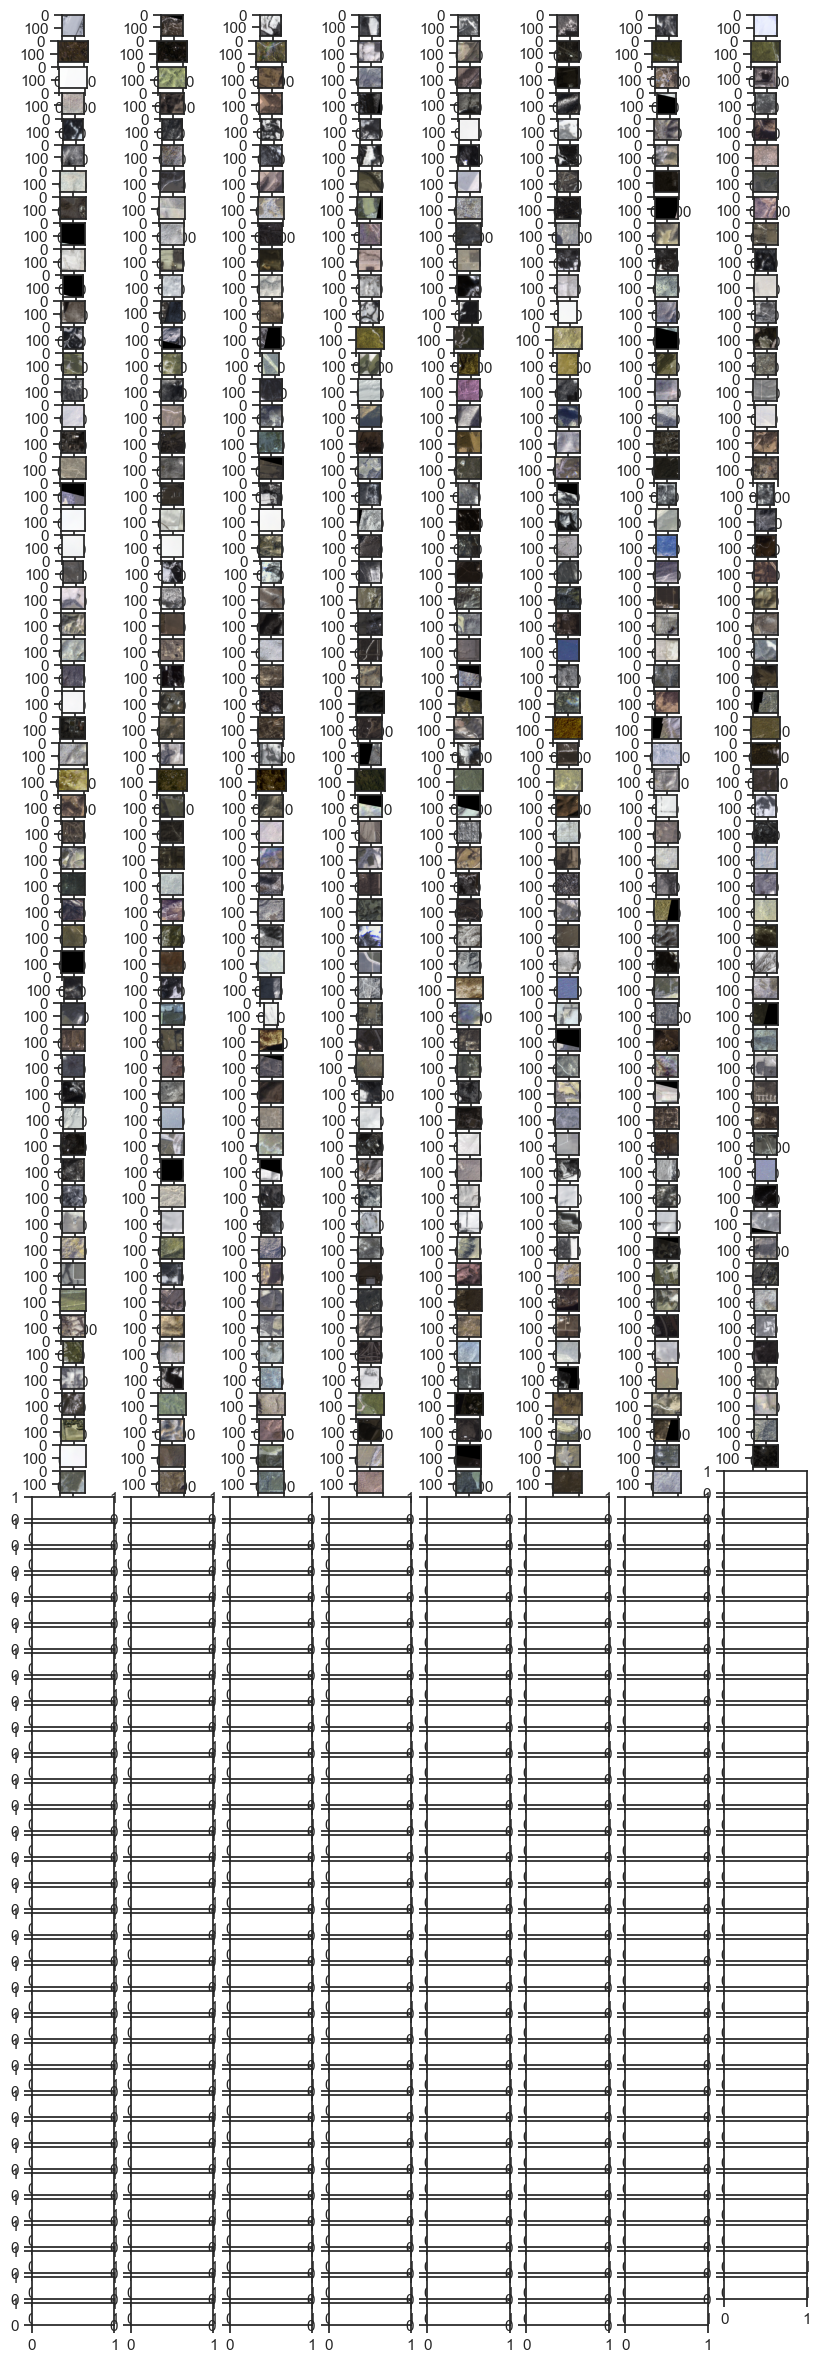

In [13]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
from remseno import *
fig_dir = f'{data_dir}fig/'
n = 8
fig, axs = plt.subplots(len(set(df['species'].values))-1, n, figsize=(10, 30), facecolor='w', edgecolor='w')

axs = axs.ravel()
axi = 0
for species in set(df['species'].values):
    sub_df = df[df['species'] == species]
    ni = 0
    for img_path in sub_df['path'].values:
        if ni >= n:
            break
        if img_path != None:
            o = Image()
            o.load_image(image_path=img_path)
            o.name = species
            ax = o.plot_rbg(axs[axi])
            axi += 1
            ni += 1
plt.axis('off')
plt.savefig(f'{fig_dir}planetscope_data_overview.svg')
plt.show()


# Get manually annotated trees to create a mask based on them

Here I manually annotated 5 trees from each species and we can use this to annotate all pixels that meet the thresholds on all bands and all incides as this same species (as training data)



In [47]:
set(annot_df['latitude'].values)&set(df['latitude'].values)

{46.02}

In [49]:
annot_df[annot_df['latitude'] == 46.02]


,id,latitude,longitude,tree_id,data_1,data_2,data_3,data_4,data_5,division,...,crown_radius_m,binary_label,x0,x1,y0,y1,polygon_90m,image_ids,Unnamed: 23,path
0,52489,46.02,8.79,T_496860,"46.018877, 8.791883","46.019303, 8.792329","46.019084, 8.792871","46.018289, 8.792228","46.019766, 8.792395",Angiosperm,...,2.7,0,46.019438,46.020562,8.789595,8.790405,"[(8.789594594594593, 46.020562500000004), (8.7...",20220715_092201_89_2430,NaN,None


In [50]:
df[df['latitude'] == 46.02]


,latitude,longitude,tree_id,division,family,genus,species,stem_diameter_cm,height_m,crown_radius_m,binary_label,x0,x1,y0,y1,image_ids,path
21,46.02,-123.71,T_447213,Gymnosperm,Pinaceae,Tsuga,Tsuga heterophylla,44.18,24.5,3.25,1,46.016875,46.023125,-123.712252,-123.707748,20221215_180843_61_2465,../data/harvard/neon_harvard/c697f442-d50d-408...


In [42]:
annot_df = pd.read_csv(f'../data/tallo/planetscope/manual/download_DF_dedup_manual_trees.txt', sep='\t')
annot_df['path'] = [img_id_to_paths.get(image_id) for image_id in annot_df['image_ids'].values]
annot_df = annot_df.dropna(subset=['data_5'])
# Save the coords as a df for each of the rows
t_ids = annot_df['tree_id'].values
data_rows = annot_df[['data_1', 'data_2', 'data_3', 'data_4', 'data_5']].values
for i, s in enumerate(annot_df['species'].values):
    ids, lats, lons, species = [], [], [], []
    for d in data_rows[i]:
        lat_lon = d.strip().split(',')
        lats.append(float(lat_lon[0]))
        lons.append(float(lat_lon[1]))
        ids.append(t_ids[i])
        species.append(s)
    t_df = pd.DataFrame()
    t_df['id'] = ids
    t_df['lat'] = lats
    t_df['lon'] = lons
    t_df['species'] = species
    t_df.to_csv(f'{data_dir}coords/{t_ids[i]}.csv', index=False)

In [43]:
annot_df['path'].values

array([None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None],
      dtype=object)

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


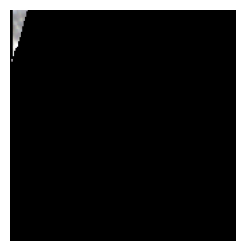

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


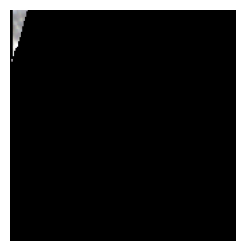

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


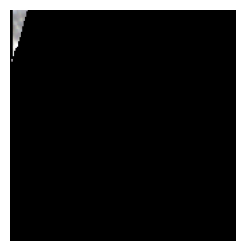

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


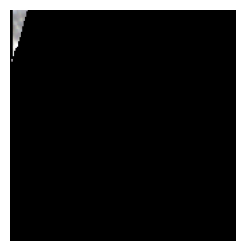

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


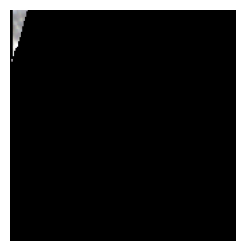

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


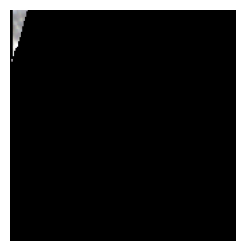

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


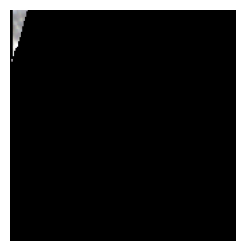

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


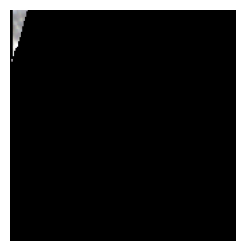

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


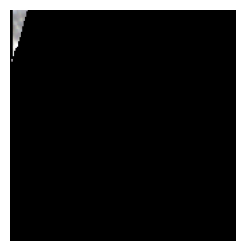

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


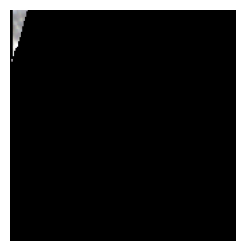

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


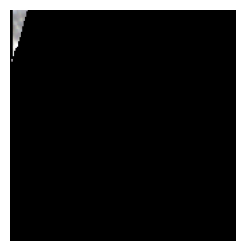

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


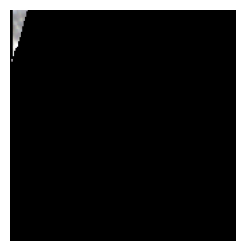

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


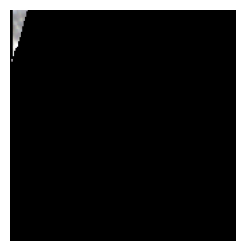

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


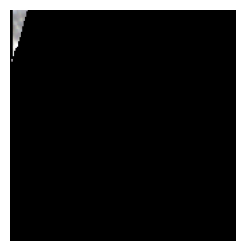

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


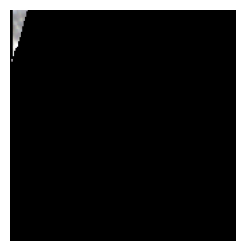

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


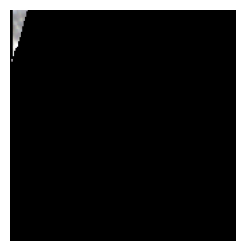

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


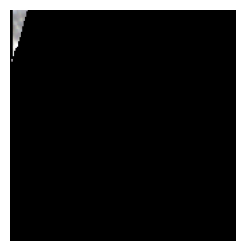

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


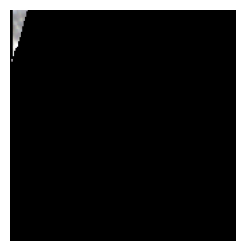

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


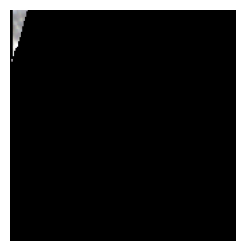

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


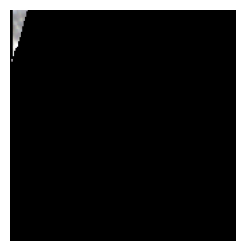

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


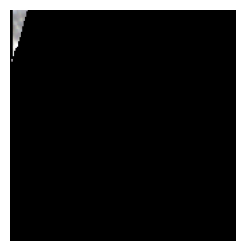

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


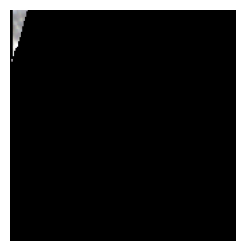

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


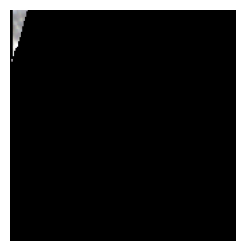

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


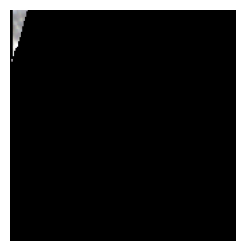

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


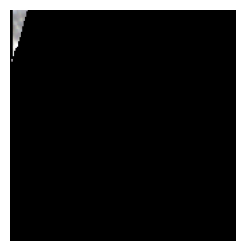

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


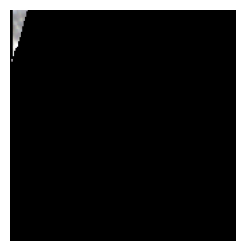

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


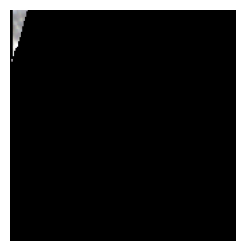

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


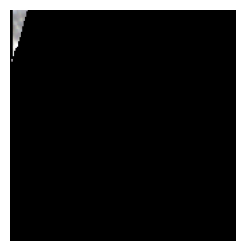

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


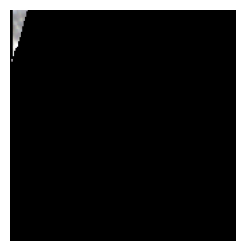

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


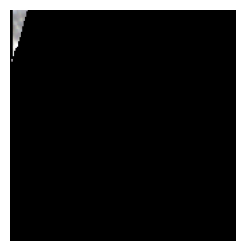

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


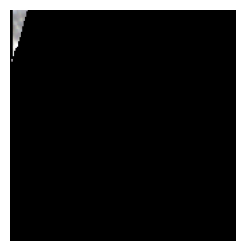

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


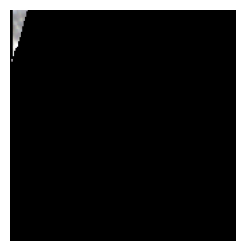

--------------------------------------------------------------------------------
left edge coord:	423201.0	
bottom edge coord:	5039820.0	
right edge coord:	423699.0	
top edge coord:	5040330.0	
dataset width:	166	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 423201.00|
| 0.00,-3.00, 5040330.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.			 in column:	species	Your dataset origionally had:	5	
Now you have:	5	
--------------------------------------------------------------------------------


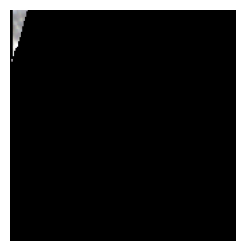

In [37]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

plt.rcParams['svg.fonttype'] = 'none'
t_ids = annot_df['tree_id'].values
fig_dir = f'{data_dir}fig/'
for i, img_path in enumerate(annot_df['path'].values):
    if img_path != None:
        o = Image()
        o.load_image(image_path=img_path)
        c = Coords(f'{data_dir}coords/{t_ids[i]}.csv', x_col='lon', y_col='lat', label_col='species',
               id_col='id', sep=',', class1="", class2="", crs="EPSG:4326")
        #c.transform_coords(tree_coords="EPSG:4326", image_coords=str(o.image.crs), plot=True)
        #c.plot_on_image(o)
        ax = o.plot_rbg()
        plt.show()


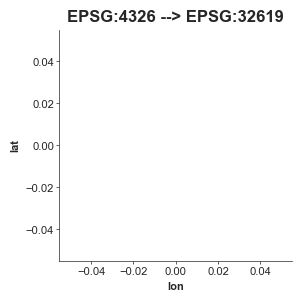

In [35]:
c.transform_coords(tree_coords="EPSG:4326", image_coords=str(o.image.crs), plot=True)
